### Objective of the Project : -

From the given data, we need to perform various analysis of data cleaning. The process of identifying and fixing (or eliminating) erroneous or corrupt records from the data is known as data cleaning or cleansing. Incomplete, wrong, faulty, or irrelevant data pieces are identified, and the erroneous or imprecise data is then replaced, modified, or removed.

Incorrect Data Could be:
1. Empty cells
2. Data in wrong format
3. Wrong data
4. Duplicates

### Data Information : -

*Explanatory Variables:*
1. Region - Region of where the store resides
2. Store ID - The ID of a particular store
3. Population - The total population within 20 miles of  where the store resides
4. Store Opening - The day the store opened its doors for business.
5. Sales Staff - The amount of store workers per 1000 square feet of the retail store
6. Monthly Traffic - The average amount of shoppers that visit the store on a monthly basis
7. Review - A customer's review of their store experience (1 -  5) 5 is good.
8. AI System - A cloud based AI system used by the store that enables them to organize products based on shoppers' behavior and facial recogntion.
9. Product Purchased - The product type that was purchased by a customer.
10. Coupon Receive - How a particular customer retrieved a coupon that was emailed to them (either on a PC/laptop, or on a mobile device)
11. Store App - The percentage of customers that purchased using the store app.
12. Avg Monthly Facebook - The average montly traffic that the store's facebook page receives.
13. Ship to Store - Whether the store receives internet orders (products purchased online) that can be picked up by customers
14. Store Location - Whether store is a stand alone building or is in a mall.
15. Staff Age - The age of a staff worker in the retail store
16. Staff Background - The type of experience (background) of a salesperson at the store.
17. Loyalty Card - Whether a customer used a loyalty card when purchasing a product
18. % Sales College - The percentage of the salesforece that has a Bachelors degree from college.
19. Parking Places - The amount of available parking places where the store resides

*Target Variable:*

20. Total Sales - Monthly sales generated by the particular branch

### Importing Necessary Packages and Modules

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

### Data Fetching

Data fetching involves extraction of data from the excel file which comprises of 20 columns. Total Sales is the output column and all other columns are input columns.

This step involves reading the excel file through pandas 'read_excel' file.

In [ ]:
xls_data = pd.ExcelFile("sport.xls")

In [ ]:
df1 = pd.read_excel(xls_data,"Sporting Goods Data")

In [ ]:
type(df1)

pandas.core.frame.DataFrame

Getting glimpse of the data

In [ ]:
df1.head(5)

,Region,Store ID,Population,Store Opening,Sales Staff/1000 Sq ft,Monthly Traffic,Review,AI System,Product Purchased,Coupon Receive,App,Avg Monthy Facebook,Ship to Store,Store Location,Staff Age,Sales BackGround,Loyalty Card,% Sales Staff College,Parking Places,Total Sales
0,NorthEast,1000,70636,2008-04-19,16,6190,1,Yes,Football,Mobile,0.08,18160,No Ship,Stand Alone,30,Operations,No,0.75,9,156607.0
1,NorthEast,1001,4777,2014-11-23,19,1677,3,Yes,Football,PC,0.09,46171,No Ship,Mall,22,Operations,No,0.90,5,42428.1
2,NorthEast,1002,101537,2013-11-08,9,10439,2,No,Football,PC,0.48,13.xxx,No Ship,Mall,25,Operations,No,0.97,16,264106.7
3,NorthEast,1003,87932,2008-11-13,12,3971,5,No,Soccer,PC,0.60,35540,No Ship,Stand Alone,32,Operations,Yes,0.92,8,100466.3
4,NorthEast,1004,27742,2013-06-24,2,2879,1,No,Tennis,PC,0.25,29051,No Ship,Stand Alone,27,Operations,Yes,0.89,9,72838.7


Checking the values of "Region" column

In [ ]:
df1.columns

Index(['Region', 'Store ID', 'Population', 'Store Opening',
       'Sales Staff/1000 Sq ft', 'Monthly Traffic', 'Review', 'AI System',
       'Product Purchased', 'Coupon Receive', 'App', 'Avg Monthy Facebook',
       'Ship to Store', 'Store Location', 'Staff Age', 'Sales BackGround',
       'Loyalty Card', '% Sales Staff  College', 'Parking Places',
       'Total Sales '],
      dtype='object')

Renaming the columns in the dataframe

In [ ]:
df1=df1.rename(columns={'Monthly Traffic':'Monthly_Traffic','Store ID':'Store_Id','Store Opening':'Store_Opening','Sales Staff/1000 Sq ft':'Sales_Staff_Sq_ft','AI System':'AI_System','Product Purchased':'Product_Purchased','Coupon Receive':'Coupon_Receive','Avg Monthy Facebook':'Avg_Monthy_Facebook','Ship to Store':'Ship_to_Store','Store Location':'Store_Location','Staff Age':'Staff_Age','Sales BackGround':'Sales_BackGround','Loyalty Card':'Loyalty_Card','% Sales Staff  College':'Sales_Staff_College','Parking Places':'Parking_Places','Total Sales ':'Total_Sales'})

In [ ]:
df1.columns

Index(['Region', 'Store_Id', 'Population', 'Store_Opening',
       'Sales_Staff_Sq_ft', 'Monthly_Traffic', 'Review', 'AI_System',
       'Product_Purchased', 'Coupon_Receive', 'App', 'Avg_Monthy_Facebook',
       'Ship_to_Store', 'Store_Location', 'Staff_Age', 'Sales_BackGround',
       'Loyalty_Card', 'Sales_Staff_College', 'Parking_Places', 'Total_Sales'],
      dtype='object')

Checking for the null values in all the columns. One of the most difficult yet frequent aspects of data cleaning is dealing with missing data or values.

In [ ]:
for i in df1.columns:
    print(f'{i}:',df1[i].isnull().sum())

Region: 0
Store_Id: 0
Population: 0
Store_Opening: 0
Sales_Staff_Sq_ft: 0
Monthly_Traffic: 0
Review: 0
AI_System: 0
Product_Purchased: 0
Coupon_Receive: 0
App: 0
Avg_Monthy_Facebook: 0
Ship_to_Store: 0
Store_Location: 0
Staff_Age: 0
Sales_BackGround: 0
Loyalty_Card: 0
Sales_Staff_College: 0
Parking_Places: 0
Total_Sales: 0


Checking for numerical columns

In [ ]:
df_numeric = df1.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Store_Id' 'Population' 'Sales_Staff_Sq_ft' 'Monthly_Traffic' 'Review'
 'App' 'Staff_Age' 'Sales_Staff_College' 'Total_Sales']


The describe() method returns description of the data in the DataFrame.

If the DataFrame contains numerical data, the description contains these information for each column:
1. count - The number of not-empty values.
2. mean - The average (mean) value.
3. std - The standard deviation.
4. min - the minimum value.
5. 25% - The 25% percentile*.
6. 50% - The 50% percentile*.
7. 75% - The 75% percentile*.
8. max - the maximum value.

In [ ]:
df1.describe()

,Store_Id,Population,Sales_Staff_Sq_ft,Monthly_Traffic,Review,App,Avg_Monthy_Facebook,Staff_Age,Sales_Staff_College,Total_Sales
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,160.000000,163.000000,163.000000,1.630000e+02
mean,1077.110429,51247.214724,10.613497,5831.938650,2.907975,0.306994,28714.393750,27.699387,0.879632,4.096269e+05
std,47.014840,29105.050623,5.488850,2802.865544,1.477443,0.193812,12017.133112,9.768389,0.083013,3.341585e+06
min,1000.000000,3861.000000,2.000000,1311.000000,1.000000,-0.200000,9102.000000,18.000000,0.650000,3.316830e+04
25%,1036.500000,26770.500000,6.000000,3343.500000,2.000000,0.150000,18096.000000,23.000000,0.810000,8.584290e+04
50%,1077.000000,51019.000000,11.000000,5635.000000,3.000000,0.280000,29030.500000,26.000000,0.880000,1.460063e+05
75%,1117.500000,76185.000000,15.000000,8424.500000,4.000000,0.480000,37639.500000,29.000000,0.950000,2.136712e+05
max,1158.000000,101785.000000,20.000000,10504.000000,7.000000,0.650000,49976.000000,105.000000,1.090000,4.280090e+07


In [ ]:
df1.Region.unique()

array(['NorthEast', 'SouthEast', 'WestCoast', 'South-West'], dtype=object)

Checking the mean of all the numerical columns

In [ ]:
df1.mean(axis=0,skipna=True)

/var/folders/05/d23cmml918sdym4kjk5s4xy00000gn/T/ipykernel_8287/220345932.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df1.mean(axis=0,skipna=True)
/var/folders/05/d23cmml918sdym4kjk5s4xy00000gn/T/ipykernel_8287/220345932.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.mean(axis=0,skipna=True)


Store_Id                 1077.110429
Population              51247.214724
Sales_Staff_Sq_ft          10.613497
Monthly_Traffic          5831.938650
Review                      2.907975
App                         0.306994
Avg_Monthy_Facebook     28714.393750
Staff_Age                  27.699387
Sales_Staff_College         0.879632
Total_Sales            409626.895092
dtype: float64

The "Avg_Monthy_Facebook" column contains a number of randomly inaccurate values. It will be replaced with the NA value using the built-in replace() method. The replace() method replaces a specified phrase with another specified phrase.

In [ ]:
df1['Avg_Monthy_Facebook']=df1['Avg_Monthy_Facebook'].replace(r'[0-9].[a-zA-Z]',value=np.NaN,regex=True)

In [ ]:
df1['Avg_Monthy_Facebook']

0      18160
1      46171
2        NaN
3      35540
4      29051
       ...  
158    19720
159    46973
160    20612
161    28036
162    19860
Name: Avg_Monthy_Facebook, Length: 163, dtype: object

In [ ]:
avg = df1['Avg_Monthy_Facebook'].mean(axis=0,skipna=True)
avg

28714.39375

Replacing the "NA" value with the mean of the column. One of the techniques is mean imputation in which the missing values are replaced with the mean value of the entire feature column.

In [ ]:
df1['Avg_Monthy_Facebook']=df1['Avg_Monthy_Facebook'].replace(np.NaN,value=avg)

In [ ]:
df1['Avg_Monthy_Facebook']

0      18160.00000
1      46171.00000
2      28714.39375
3      35540.00000
4      29051.00000
          ...     
158    19720.00000
159    46973.00000
160    20612.00000
161    28036.00000
162    19860.00000
Name: Avg_Monthy_Facebook, Length: 163, dtype: float64

In [ ]:
df1.head()

,Region,Store_Id,Population,Store_Opening,Sales_Staff_Sq_ft,Monthly_Traffic,Review,AI_System,Product_Purchased,Coupon_Receive,App,Avg_Monthy_Facebook,Ship_to_Store,Store_Location,Staff_Age,Sales_BackGround,Loyalty_Card,Sales_Staff_College,Parking_Places,Total_Sales
0,NorthEast,1000,70636,2008-04-19,16,6190,1,Yes,Football,Mobile,0.08,18160.00000,No Ship,Stand Alone,30,Operations,No,0.75,9,156607.0
1,NorthEast,1001,4777,2014-11-23,19,1677,3,Yes,Football,PC,0.09,46171.00000,No Ship,Mall,22,Operations,No,0.90,5,42428.1
2,NorthEast,1002,101537,2013-11-08,9,10439,2,No,Football,PC,0.48,28714.39375,No Ship,Mall,25,Operations,No,0.97,16,264106.7
3,NorthEast,1003,87932,2008-11-13,12,3971,5,No,Soccer,PC,0.60,35540.00000,No Ship,Stand Alone,32,Operations,Yes,0.92,8,100466.3
4,NorthEast,1004,27742,2013-06-24,2,2879,1,No,Tennis,PC,0.25,29051.00000,No Ship,Stand Alone,27,Operations,Yes,0.89,9,72838.7


Taking the next column for the data cleaning. The "Review" column should consist only of values from 1 to 5. Writing a loop to check how many values are there which is more than 5.

In [ ]:
for i in df1['Review']:
    if(i>5):
        print(i)


6
7


Checking the value distribution of the column

In [ ]:
df1['Review'].value_counts()

1    39
3    32
2    31
4    31
5    28
6     1
7     1
Name: Review, dtype: int64

Replacing "6" and "7" with the majority value. Here, "1" is appearing more than any number. We are replacing "6" and "7" with "1".

In [ ]:
df1['Review']=df1['Review'].replace(6,value=1)
df1['Review']=df1['Review'].replace(7,value=1)

In [ ]:
df1['Review'].value_counts()

1    41
3    32
2    31
4    31
5    28
Name: Review, dtype: int64

Running the analysis of the next column. Checking what type of values we have in the "AI_System" column.

In [ ]:
df1['AI_System'].unique()

array(['Yes', 'No', 'j', 'Yes ', 'Nyes'], dtype=object)

There is some extra space after "Yes". Removing the extra space from the value.

In [ ]:
df1['AI_System']=df1['AI_System'].replace('Yes ',value='Yes')

In [ ]:
df1['AI_System'].value_counts()

No      108
Yes      52
j         2
Nyes      1
Name: AI_System, dtype: int64

We are having more "No" values than "Yes". We can replace "j" and "Nyes" with "No".

In [ ]:
df1['AI_System']=df1['AI_System'].replace('j',value='No')
df1['AI_System']=df1['AI_System'].replace('Nyes',value='No')

In [ ]:
df1['AI_System'].unique()

array(['Yes', 'No'], dtype=object)

Checking the next column "Product_Purchased"

In [ ]:
df1['Product_Purchased'].value_counts()

WorkOut       43
Running       40
Soccer        26
Football      20
Tennis        16
Baseball      10
Biking         5
s              1
ss             1
Basketball     1
Name: Product_Purchased, dtype: int64

We can see some random values in the column. We can replace it with the majority value in the data.

In [ ]:
df1['Product_Purchased']=df1['Product_Purchased'].replace('s',value='WorkOut')
df1['Product_Purchased']=df1['Product_Purchased'].replace('ss',value='WorkOut')

In [ ]:
df1['Product_Purchased'].value_counts()

WorkOut       45
Running       40
Soccer        26
Football      20
Tennis        16
Baseball      10
Biking         5
Basketball     1
Name: Product_Purchased, dtype: int64

Checking the next column "Coupon_Receive"

In [ ]:
df1['Coupon_Receive'].value_counts()

Mobile    83
PC        80
Name: Coupon_Receive, dtype: int64

The "Coupon_Recieve" column doesn't need any data-cleaning technique.

Inspecting the "App" column

In [ ]:
df1['App'].value_counts()

0.22    8
0.60    6
0.09    6
0.52    6
0.18    6
       ..
0.56    1
0.26    1
0.35    1
0.62    1
0.38    1
Name: App, Length: 61, dtype: int64

By looking at the data in the "App" column, we can see that there are some negative values. Running the loop to check for the negative values.

In [ ]:
for i in df1['App']:
    if i < 0:
        print(i)

-0.2


Calculating mean to impute value in place of the negative value.

In [ ]:
avg_app = df1['App'].mean()
avg_app = np.round(avg_app,2)
avg_app

0.31

In [ ]:
df1['App']=df1['App'].replace(-0.2,value=avg_app)

In [ ]:
for i in df1['App']:
    if i < 0:
        print(i)

Examine the data in our next column "Ship_to_Store"

In [ ]:
df1['Ship_to_Store'].value_counts()

Ship         83
No Ship      79
ShpNoShip     1
Name: Ship_to_Store, dtype: int64

Replacing the random incorrect value with the majority value in the column.

In [ ]:
df1['Ship_to_Store']=df1['Ship_to_Store'].replace('ShpNoShip',value='Ship')

In [ ]:
df1['Ship_to_Store'].value_counts()

Ship       84
No Ship    79
Name: Ship_to_Store, dtype: int64

Exploring the next columns "Store_Location", "Loyalty_Card" and "Sales_BackGround"

In [ ]:
df1['Store_Location'].value_counts()

Mall           113
Stand Alone     50
Name: Store_Location, dtype: int64

In [ ]:
df1['Sales_BackGround'].value_counts()

Customer Service    63
Operations          59
Marketing           41
Name: Sales_BackGround, dtype: int64

In [ ]:
df1['Loyalty_Card'].value_counts()

Yes     89
No      74
Name: Loyalty_Card, dtype: int64

These three columns don't require any data-cleaning techniques.

Looking into the "Sales_Staff_College" column

The values of this column should not be more than 1. So we are replacing those value with 1.

In [ ]:
for i in df1['Sales_Staff_College']:
    if i > 1.0:
        df1['Sales_Staff_College']=df1['Sales_Staff_College'].replace(i,value=1.0)

Looking over the "Parking_Places" column

In [ ]:
for i in df1['Parking_Places']:
    if(type(i)!=int):
        print(i)

                'NA


We can see that there is only one random value. We are replacing that value with '0'.

In [ ]:
df1['Parking_Places']=df1['Parking_Places'].replace("'NA",value=0)

In [ ]:
for i in df1['Parking_Places']:
    if(type(i)!=int):
        df1['Parking_Places']=df1['Parking_Places'].replace(i,value=0)

In [ ]:
for i in df1['Total_Sales']:
    if(type(i)!=float):
        print(i)

In [ ]:
df1

,Region,Store_Id,Population,Store_Opening,Sales_Staff_Sq_ft,Monthly_Traffic,Review,AI_System,Product_Purchased,Coupon_Receive,App,Avg_Monthy_Facebook,Ship_to_Store,Store_Location,Staff_Age,Sales_BackGround,Loyalty_Card,Sales_Staff_College,Parking_Places,Total_Sales
0,NorthEast,1000,70636,2008-04-19,16,6190,1,Yes,Football,Mobile,0.08,18160.00000,No Ship,Stand Alone,30,Operations,No,0.75,9,156607.0
1,NorthEast,1001,4777,2014-11-23,19,1677,3,Yes,Football,PC,0.09,46171.00000,No Ship,Mall,22,Operations,No,0.90,5,42428.1
2,NorthEast,1002,101537,2013-11-08,9,10439,2,No,Football,PC,0.48,28714.39375,No Ship,Mall,25,Operations,No,0.97,16,264106.7
3,NorthEast,1003,87932,2008-11-13,12,3971,5,No,Soccer,PC,0.60,35540.00000,No Ship,Stand Alone,32,Operations,Yes,0.92,8,100466.3
4,NorthEast,1004,27742,2013-06-24,2,2879,1,No,Tennis,PC,0.25,29051.00000,No Ship,Stand Alone,27,Operations,Yes,0.89,9,72838.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,NorthEast,1001,89349,2013-07-28,18,9020,1,No,Soccer,Mobile,0.10,19720.00000,Ship,Mall,44,Operations,Yes,0.79,32,228206.0
159,NorthEast,1002,88632,2010-01-15,8,7705,3,No,Tennis,Mobile,0.06,46973.00000,Ship,Mall,21,Marketing,No,0.79,21,194936.5
160,NorthEast,1003,61567,2009-08-02,19,6669,1,Yes,Basketball,Mobile,0.34,20612.00000,Ship,Mall,32,Customer Service,No,0.90,31,168725.7
161,NorthEast,1004,29384,2011-11-08,13,9384,2,No,Football,Mobile,0.42,28036.00000,Ship,Mall,23,Customer Service,Yes,0.95,16,237415.2


We have performed detail analysis of all the columns in the data. Now, we can implement "Feature Importance" on the data.

Feature Importance refers to techniques that calculate a score for all the input features for a given model — the scores simply represent the “importance” of each feature. A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable.

In [ ]:
df2=df1
df2['Region'].value_counts()

SouthEast     64
NorthEast     55
WestCoast     31
South-West    13
Name: Region, dtype: int64

Pandas pd.get_dummies() will turn categorical column (column of labels) into indicator columns (columns of 0s and 1s).

In [ ]:
data = pd.get_dummies(df2,columns=['Region','AI_System','Product_Purchased','Coupon_Receive','Ship_to_Store','Store_Location','Sales_BackGround','Loyalty_Card'])
data.columns


Index(['Store_Id', 'Population', 'Store_Opening', 'Sales_Staff_Sq_ft',
       'Monthly_Traffic', 'Review', 'App', 'Avg_Monthy_Facebook', 'Staff_Age',
       'Sales_Staff_College', 'Parking_Places', 'Total_Sales',
       'Region_NorthEast', 'Region_South-West', 'Region_SouthEast',
       'Region_WestCoast', 'AI_System_No', 'AI_System_Yes',
       'Product_Purchased_Baseball', 'Product_Purchased_Basketball',
       'Product_Purchased_Biking', 'Product_Purchased_Football',
       'Product_Purchased_Running', 'Product_Purchased_Soccer',
       'Product_Purchased_Tennis', 'Product_Purchased_WorkOut',
       'Coupon_Receive_Mobile', 'Coupon_Receive_PC', 'Ship_to_Store_No Ship',
       'Ship_to_Store_Ship', 'Store_Location_Mall',
       'Store_Location_Stand Alone', 'Sales_BackGround_Customer Service',
       'Sales_BackGround_Marketing', 'Sales_BackGround_Operations',
       'Loyalty_Card_No', 'Loyalty_Card_Yes '],
      dtype='object')

In [ ]:
data = data.drop(columns=['Store_Opening','Store_Id'])

In [ ]:
data.columns

Index(['Population', 'Sales_Staff_Sq_ft', 'Monthly_Traffic', 'Review', 'App',
       'Avg_Monthy_Facebook', 'Staff_Age', 'Sales_Staff_College',
       'Parking_Places', 'Total_Sales', 'Region_NorthEast',
       'Region_South-West', 'Region_SouthEast', 'Region_WestCoast',
       'AI_System_No', 'AI_System_Yes', 'Product_Purchased_Baseball',
       'Product_Purchased_Basketball', 'Product_Purchased_Biking',
       'Product_Purchased_Football', 'Product_Purchased_Running',
       'Product_Purchased_Soccer', 'Product_Purchased_Tennis',
       'Product_Purchased_WorkOut', 'Coupon_Receive_Mobile',
       'Coupon_Receive_PC', 'Ship_to_Store_No Ship', 'Ship_to_Store_Ship',
       'Store_Location_Mall', 'Store_Location_Stand Alone',
       'Sales_BackGround_Customer Service', 'Sales_BackGround_Marketing',
       'Sales_BackGround_Operations', 'Loyalty_Card_No', 'Loyalty_Card_Yes '],
      dtype='object')

In [ ]:
columns = data.columns

Seperating the target variable

In [ ]:
y = data['Total_Sales']

Getting the input variables

In [ ]:
X = data.drop(columns=['Total_Sales'])

In [ ]:
y

0      156607.0
1       42428.1
2      264106.7
3      100466.3
4       72838.7
         ...   
158    228206.0
159    194936.5
160    168725.7
161    237415.2
162    229243.3
Name: Total_Sales, Length: 163, dtype: float64

We are using MinMaxScaler. MinMaxScaler divides by the range after subtracting the minimum value from each value in a feature. The range is the distinction between the minimum and maximum starting points. MinMaxScaler preserves the shape of the original distribution.

In [ ]:
mns = MinMaxScaler()
df = mns.fit_transform(data)
df

array([[0.68190638, 0.77777778, 0.5307299 , ..., 1.        , 1.        ,
        0.        ],
       [0.00935419, 0.94444444, 0.0398129 , ..., 1.        , 1.        ,
        0.        ],
       [0.99746742, 0.38888889, 0.9929294 , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.58929374, 0.94444444, 0.58283477, ..., 0.        , 1.        ,
        0.        ],
       [0.26064091, 0.61111111, 0.87816817, ..., 0.        , 0.        ,
        1.        ],
       [0.0097014 , 0.27777778, 0.84303274, ..., 0.        , 0.        ,
        1.        ]])

Dividing the data into test and train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Using random forest model. A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [ ]:
rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150)

[16 17 12 26 18 31 20 22 25 33 32 23 19 10  9  6 21 30 13 11 15 24 14  5
  3  4 29  1 28 27  7  8  0  2]


Text(0.5, 0, 'Feature Importance')

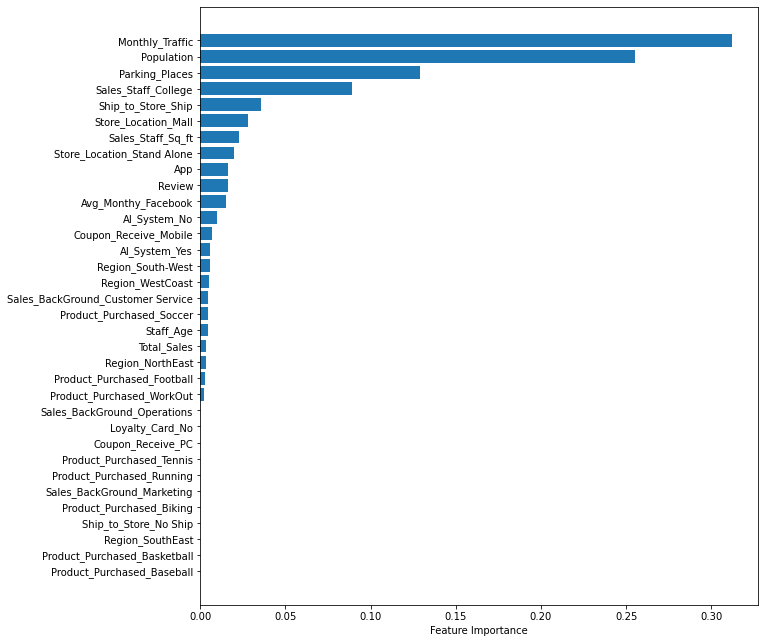

In [ ]:
from matplotlib.pyplot import figure
sort = rf.feature_importances_.argsort()
print(sort)
plt.barh(columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

By looking at the graph, we can get an understanding that the "Monthly_Traffic" column has the most correlation with the target variable. Followed by the "Population" column.